In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
ride_data_to_load = pd.read_csv('.\\Resources\\ride_data.csv')
city_data_to_load = pd.read_csv('.\\Resources\\city_data.csv')

# Read the City and Ride Data
citydata = (city_data_to_load)
ridedata = (ride_data_to_load)

# Combine the data into a single dataset
pyberdata = pd.merge(citydata, ridedata, how="left", on=["city", "city"])

# Display the data table for preview
pyberdata.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

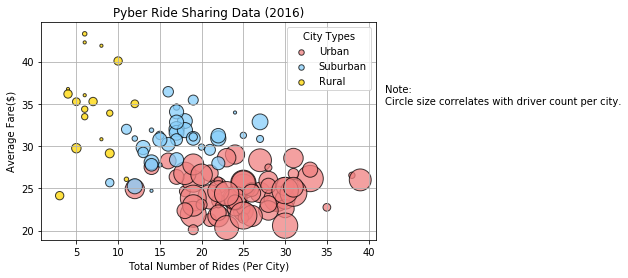

In [2]:
#Obtain the x and y coordinates for each of the three city types and build the scatter plot

#Set up for loop, colors and types will hold the correct option for the chart to differentiate between city types
#Counter is used to move sequentially through the lists
colors = ["lightcoral","lightskyblue","gold"]
types = ["Urban","Suburban","Rural"]
counter = 0

for bubble in range(3):
    plt.scatter(pyberdata.loc[pyberdata["type"]==types[counter]].groupby("city")["fare"].count(),\
                pyberdata.loc[pyberdata["type"]==types[counter]].groupby("city")["fare"].mean(),\
                s=citydata.loc[citydata["type"]==types[counter]].groupby("city")["driver_count"].sum()*10,\
                marker="o", color=colors[counter],alpha=.75,edgecolors ="k",label=types[counter])
    counter +=1

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.grid(True)

# Create a legend
lgnd = plt.legend(loc=0,title="City Types")

#The below makes the legend bubbles all the same size
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

#Incorporate a text label regarding circle size
#Note:This does not show if using %Matplotlib Notebook
plt.text(42,35,"Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig('.\\Output\\ridesharing.png')

## Total Fares by City Type

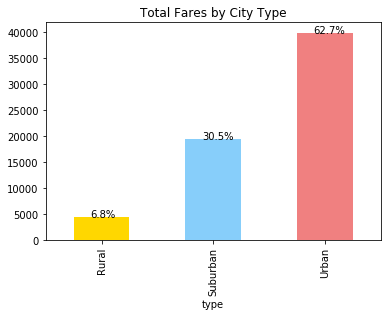

In [3]:
# Build Bar Chart
colors = ["gold","lightskyblue","lightcoral"]
ax = pyberdata.groupby("type")["fare"].sum().plot(kind="bar",title="Total Fares by City Type",color=colors)

#Add percentages to bars to show percentage of total
totals = [i.get_height() for i in ax.patches]
total = sum(totals)
  
for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height(),str(round((i.get_height()/total)*100, 1))+'%')
    
# Save Figure
plt.savefig('.\\Output\\faresbytype.png')

## Total Rides by City Type

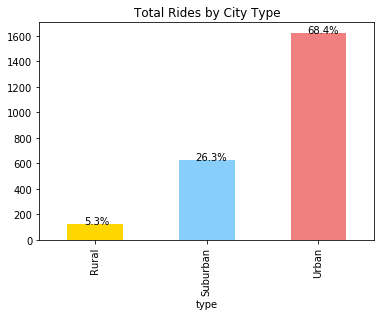

In [4]:
# Build Bar Chart
ax = pyberdata.groupby("type")["fare"].count().plot(kind="bar",title="Total Rides by City Type",color=colors)

#Add percentages to bars to show percentage of total
totals = [i.get_height() for i in ax.patches]
total = sum(totals)
  
for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height(),str(round((i.get_height()/total)*100, 1))+'%')
    
# Save Figure
plt.savefig('.\\Output\\ridesbytype.png')

## Total Drivers by City Type

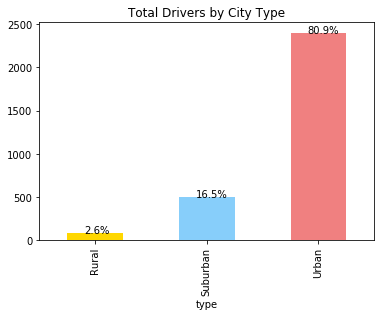

In [5]:
# Calculate Driver Percents
ax = citydata.groupby("type")["driver_count"].sum().plot(kind="bar",title="Total Drivers by City Type",color=colors)

#Add percentages to bars to show percentage of total
totals = [i.get_height() for i in ax.patches]
total = sum(totals)
  
for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height(),str(round((i.get_height()/total)*100, 1))+'%')
    
# Save Figure
plt.savefig('.\\Output\\driversbytype.png')